In [14]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss, confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [15]:
#my_data=pd.read_excel('C:/Users/user/Downloads/Jypiter/Logistička regresija SAMO BGW.xlsx')


In [16]:
my_data=my_data[['SEKTOR','godine','staž','zarada', 'churn']]

In [17]:
label_encoder = LabelEncoder()
my_data['SEKTOR'] = label_encoder.fit_transform(my_data['SEKTOR']) 
sektor_ime_po_kodu = list(label_encoder.classes_)


In [18]:
y = my_data['churn']
X= my_data[['SEKTOR','godine','staž','zarada']]

In [19]:
churnTree = DecisionTreeClassifier(class_weight='balanced',criterion="entropy", max_depth = 4,min_samples_leaf=5)

In [20]:
churnTree.fit(X,y)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_leaf=5)

In [21]:
tree_proba = churnTree.predict_proba(X)[:, 1]
threshold = 0.4
tree_predictions = (tree_proba >= threshold).astype(int)
my_data["tree_predictions_0_4"] = tree_predictions


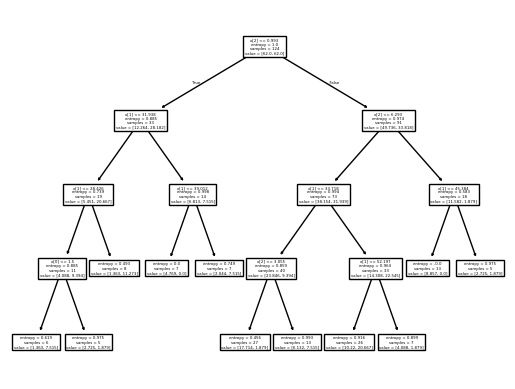

In [22]:
plot_tree(churnTree)
plt.show()

In [23]:

accuracy = accuracy_score(y, tree_predictions)
recall = recall_score(y, tree_predictions)
precision = precision_score(y, tree_predictions)
f1 = f1_score(y, tree_predictions)
logloss = log_loss(y, tree_proba)
print(f"Accuracy:  {accuracy:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score:  {f1:.3f}")
print(f"Log Loss:  {logloss:.3f}")

Accuracy:  0.669
Recall:    0.939
Precision: 0.443
F1 Score:  0.602
Log Loss:  0.485


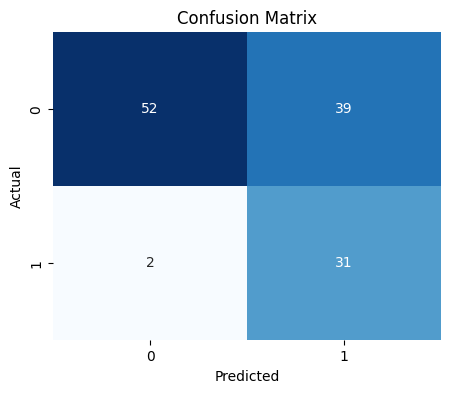

In [24]:
cm = confusion_matrix(y, tree_predictions)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [25]:
from sklearn.metrics import fbeta_score
f2 = fbeta_score(y, tree_predictions, beta=2)
print(f"F2 Score: {f2:.3f}")

F2 Score: 0.767


In [26]:
print(f"Accuracy:  {accuracy:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score:  {f1:.3f}")
print(f"Log Loss:  {logloss:.3f}")

from sklearn.metrics import fbeta_score
f2 = fbeta_score(y, tree_predictions, beta=2)
print(f"F2 Score:  {f2:.3f}")

Accuracy:  0.669
Recall:    0.939
Precision: 0.443
F1 Score:  0.602
Log Loss:  0.485
F2 Score:  0.767


In [27]:

export_df = my_data.copy()


tree_probs_both = churnTree.predict_proba(X)
export_df['procenat_ostanka'] = tree_probs_both[:, 0]
export_df['procenat_odlaska'] = tree_probs_both[:, 1]


export_df['krajnja_predikcija'] = (export_df['procenat_odlaska'] >= 0.4).astype(int)


#export_df.to_excel("C:/Users/jelena.pantic/Downloads/Jypiter/stablo_predikcija_analiza.xlsx", index=False)

#print("✅ Fajl je uspešno sačuvan kao 'stablo_predikcija_analiza.xlsx'")